# **Loan Default Prediction (EDA)**

## Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [3]:
columns = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio','Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']
numeric_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
category_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']

df_numeric_columns = train_df[numeric_columns]

## Visualization

### A. Univarite Analysis

Plot histograms in each columns in order to visualize the distributions

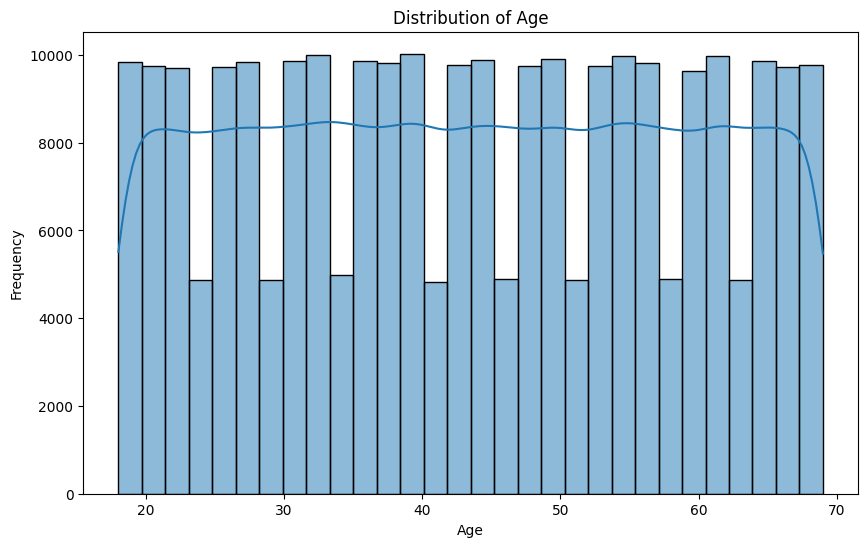

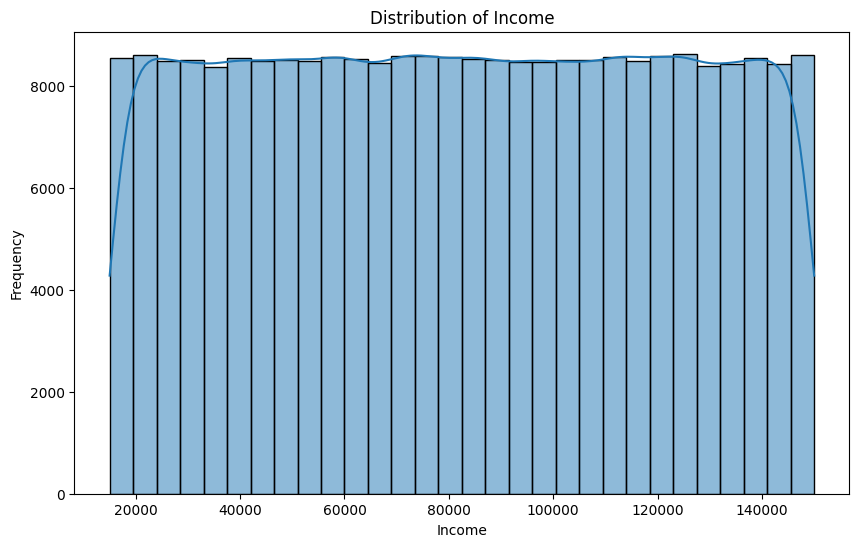

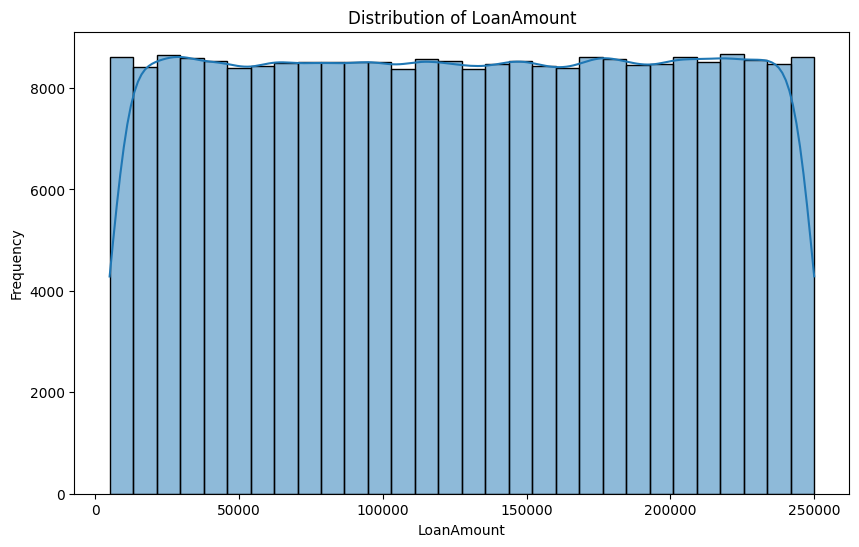

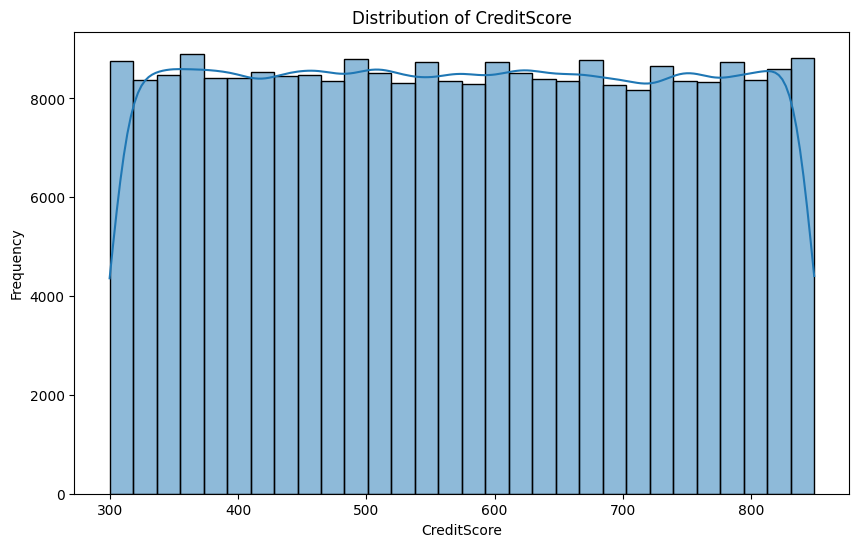

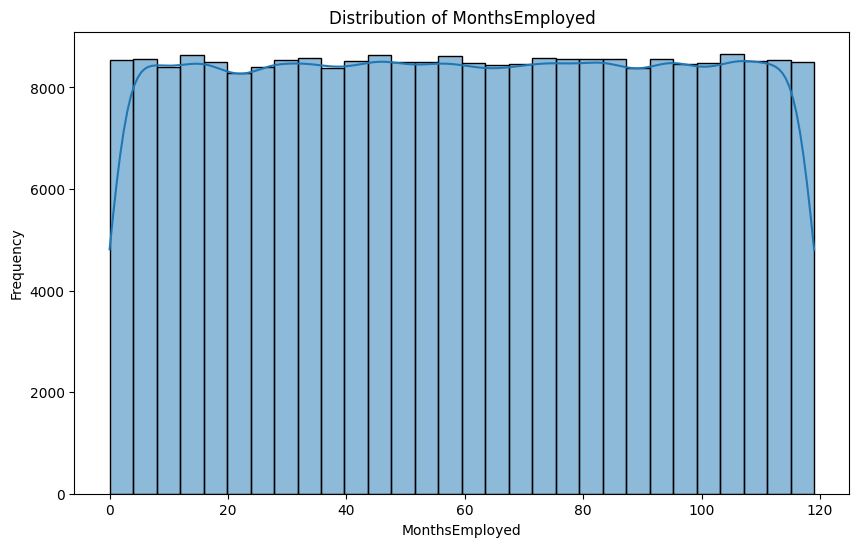

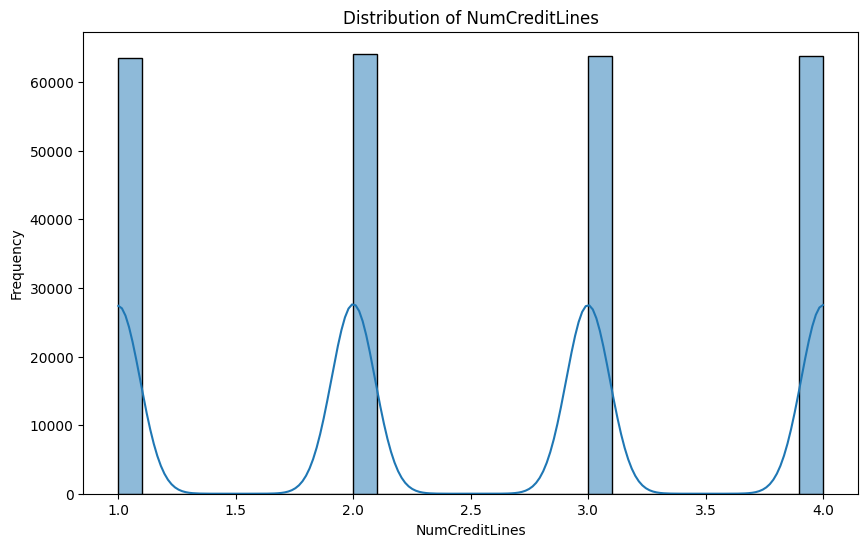

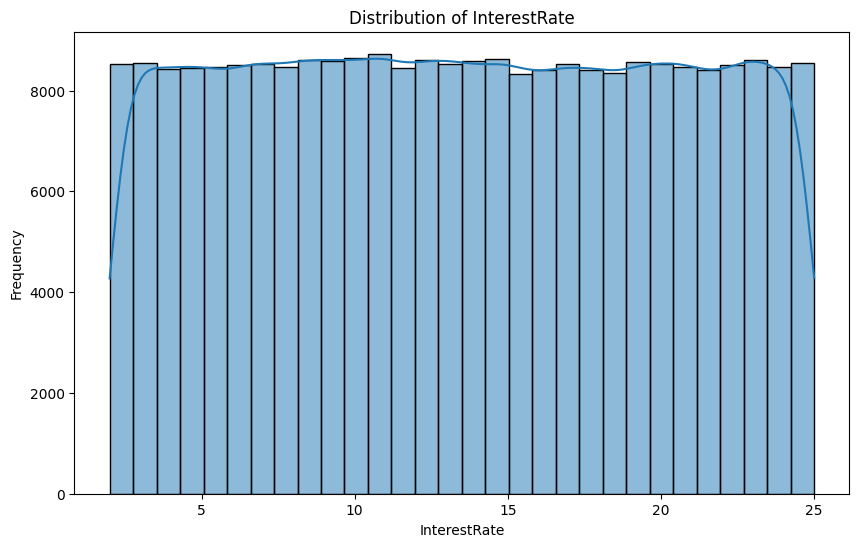

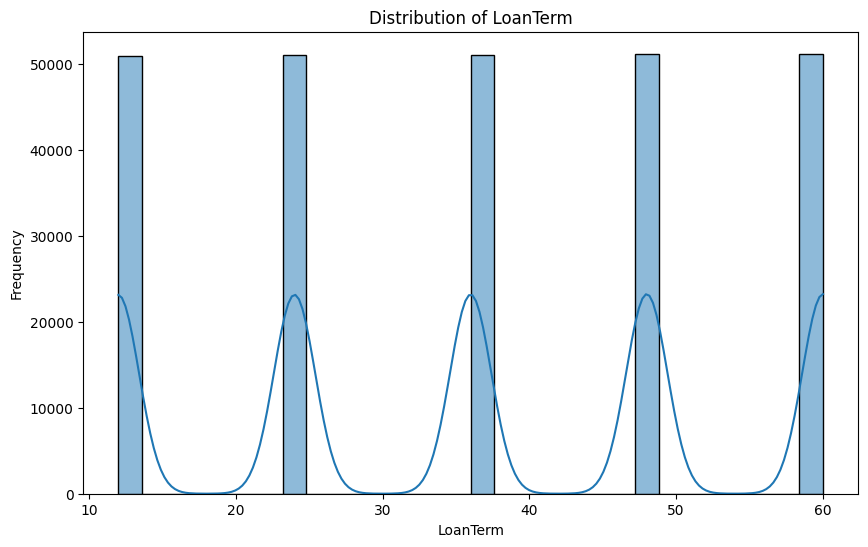

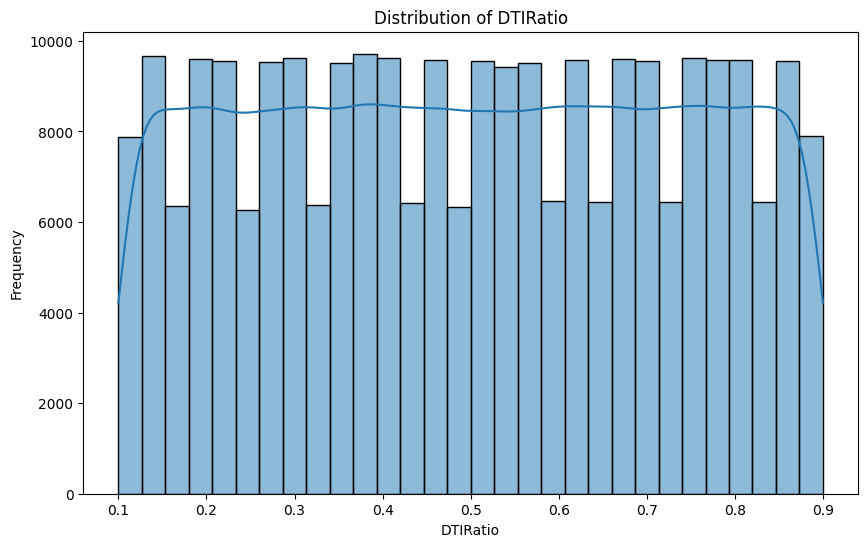

In [4]:
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

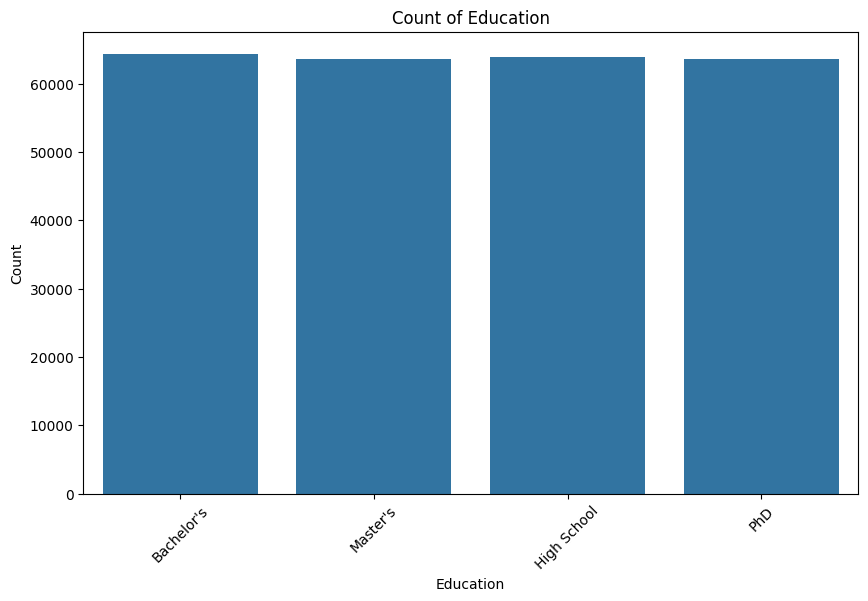

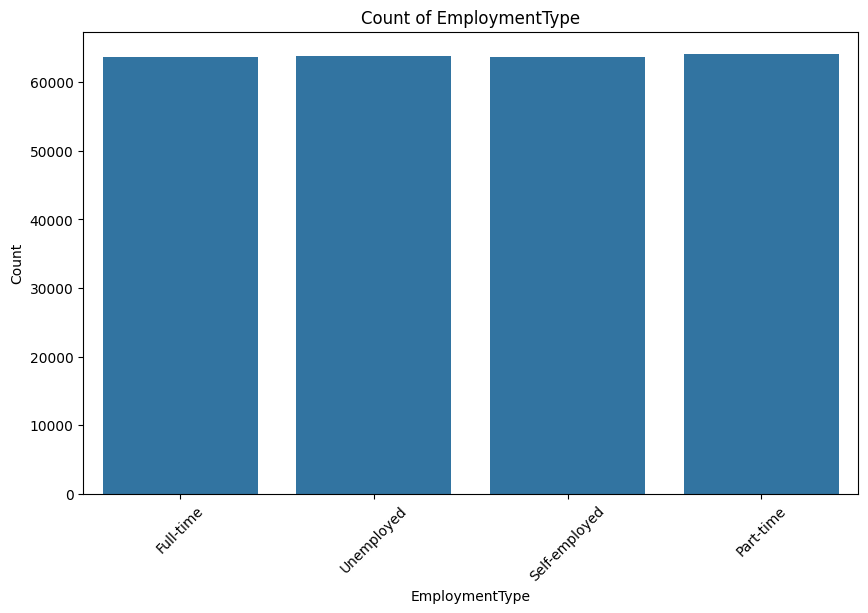

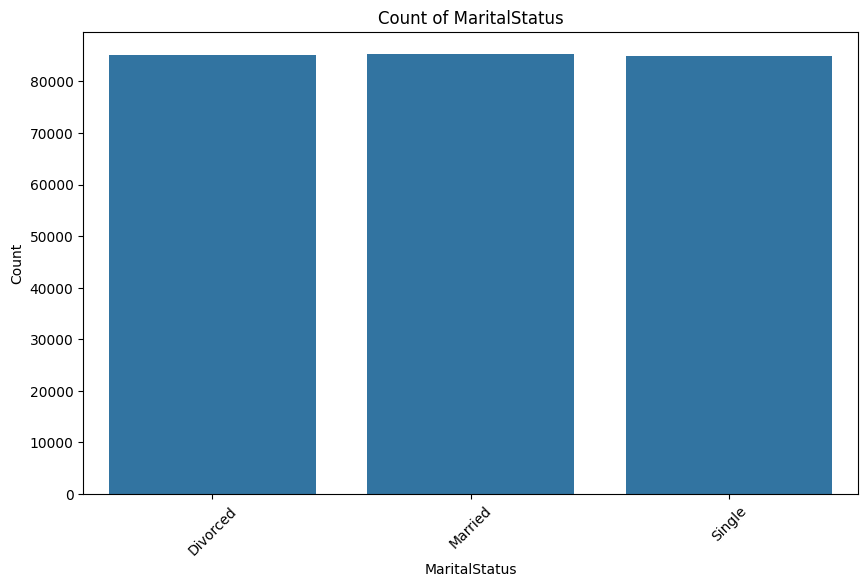

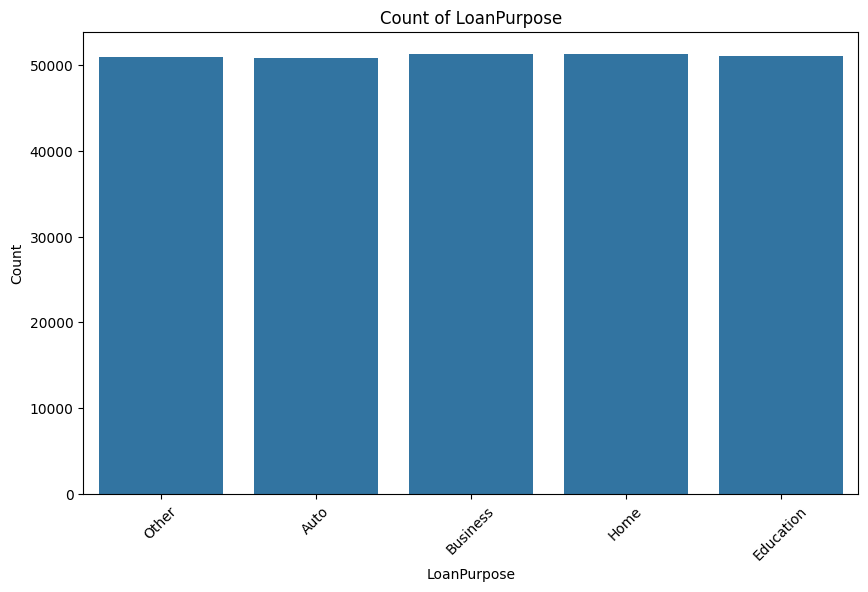

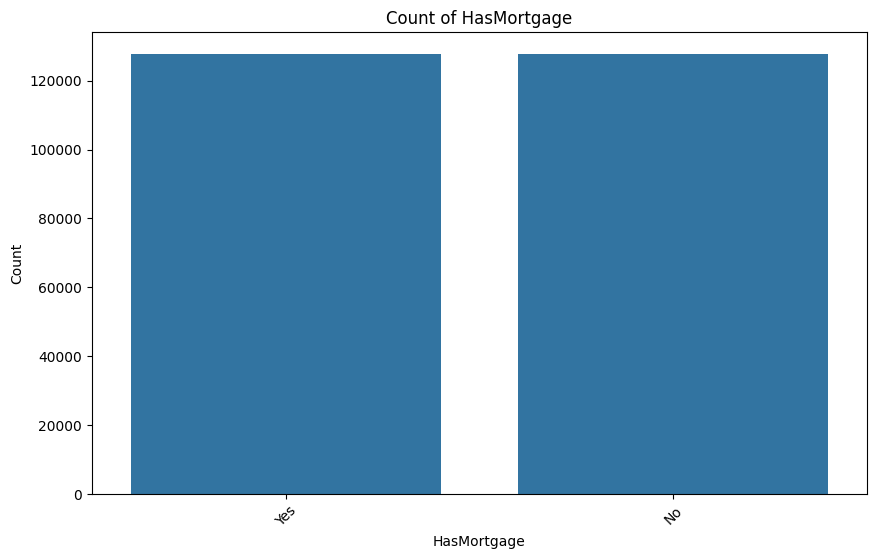

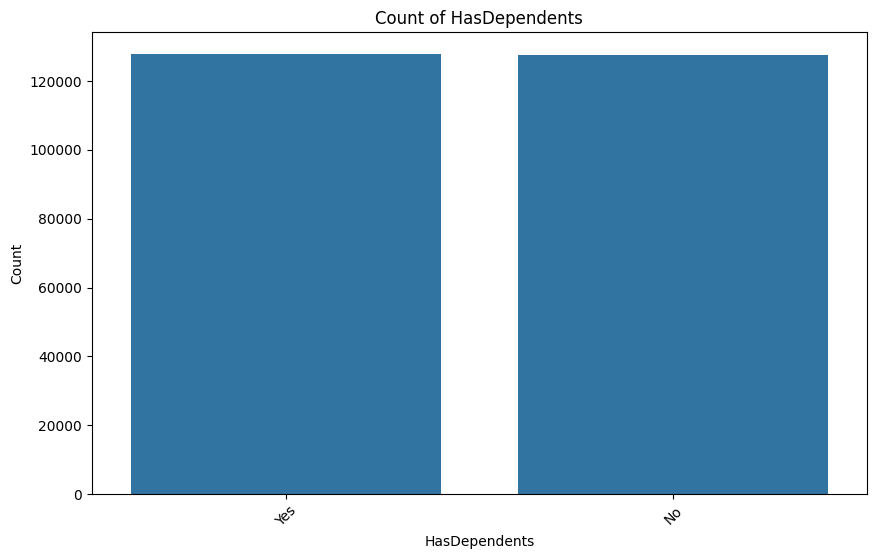

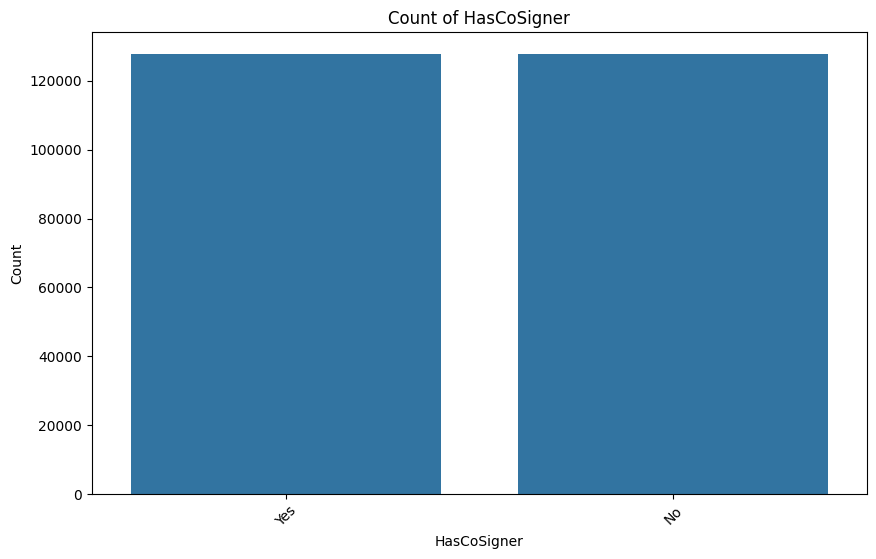

In [5]:
for col in category_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

## B. Bivariate Analysis

**Correlation Matrix**: For numeric columns, compute and visualize the correlation matrix to understand relationships between variables.

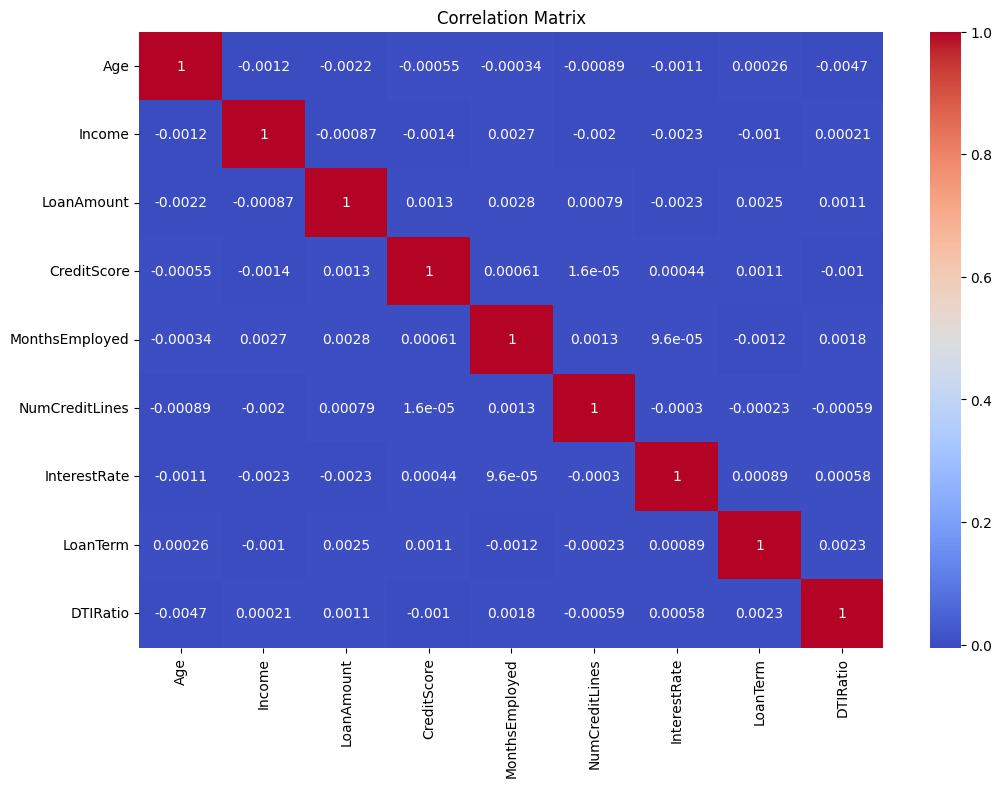

In [6]:
correlation = df_numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Box Plots**: Use box plots to examine how the numeric variables differ across categories in the categorical columns (e.g., LoanAmount across Education or EmploymentType).

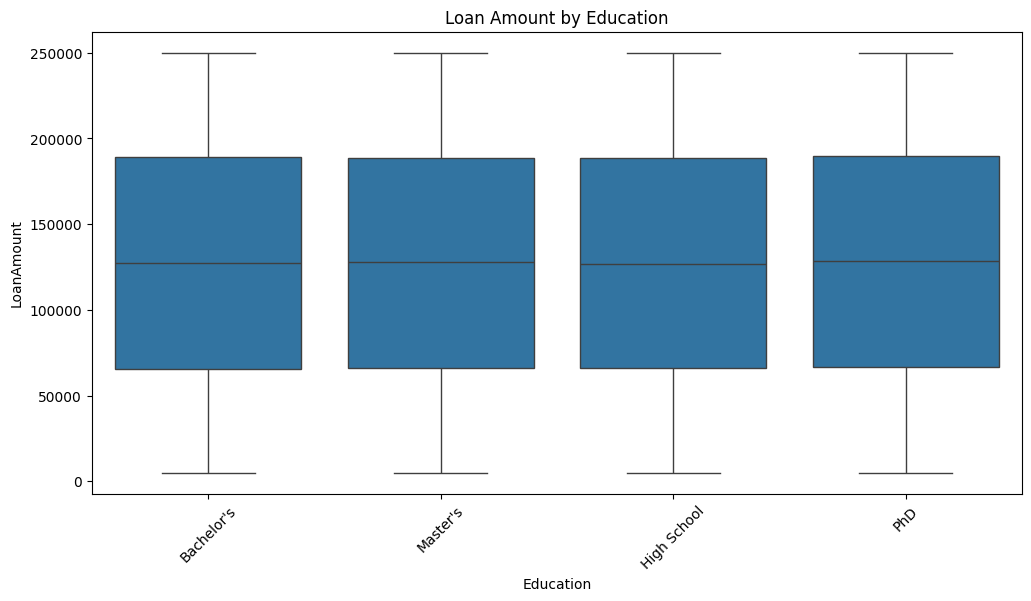

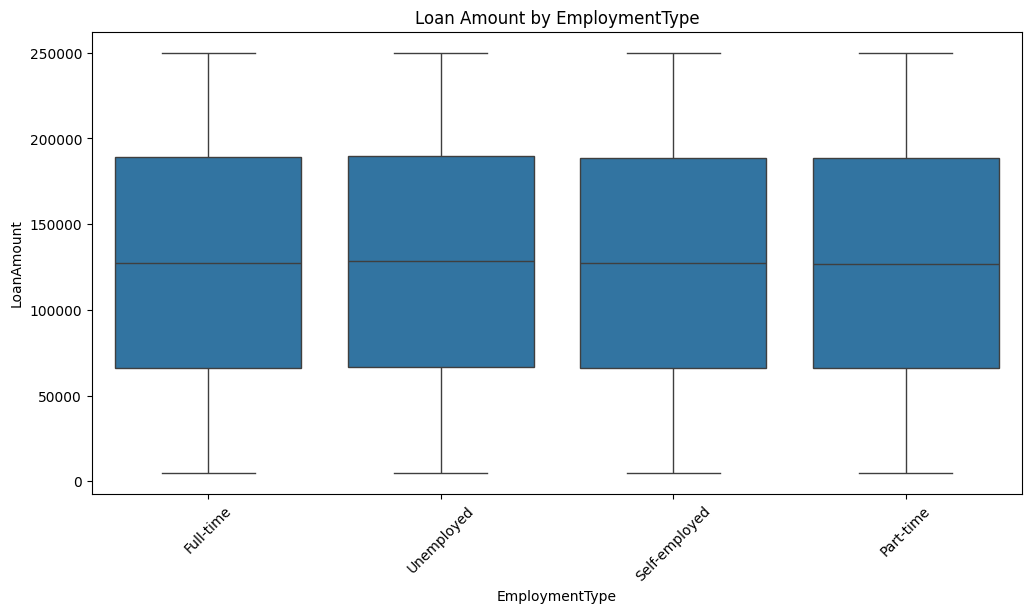

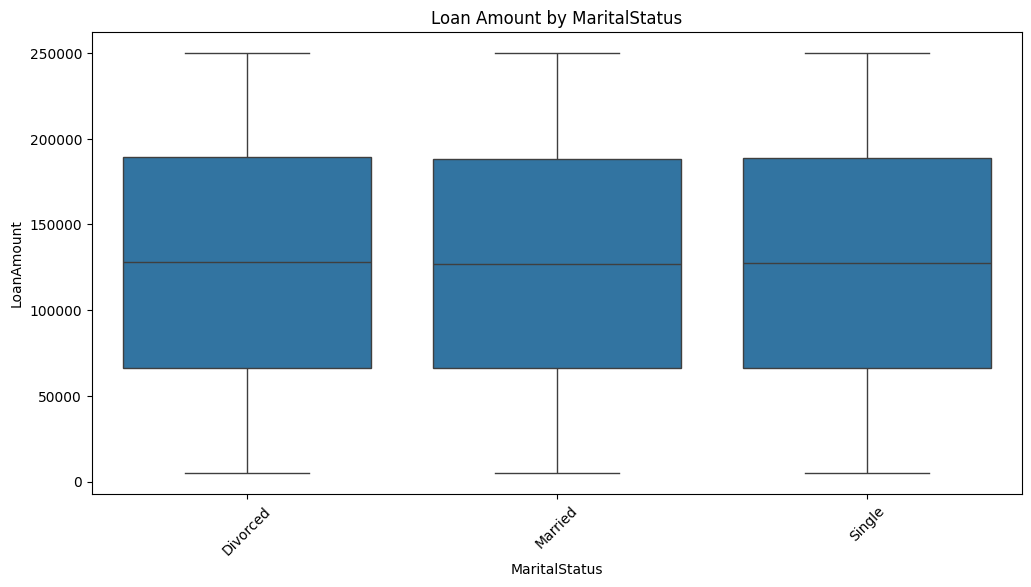

In [7]:
for col in ['Education', 'EmploymentType', 'MaritalStatus']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=train_df, x=col, y='LoanAmount')
    plt.title(f'Loan Amount by {col}')
    plt.xticks(rotation=45)
    plt.show()

**Pair Plots** Use pair plots to visualize relationships between numeric variables

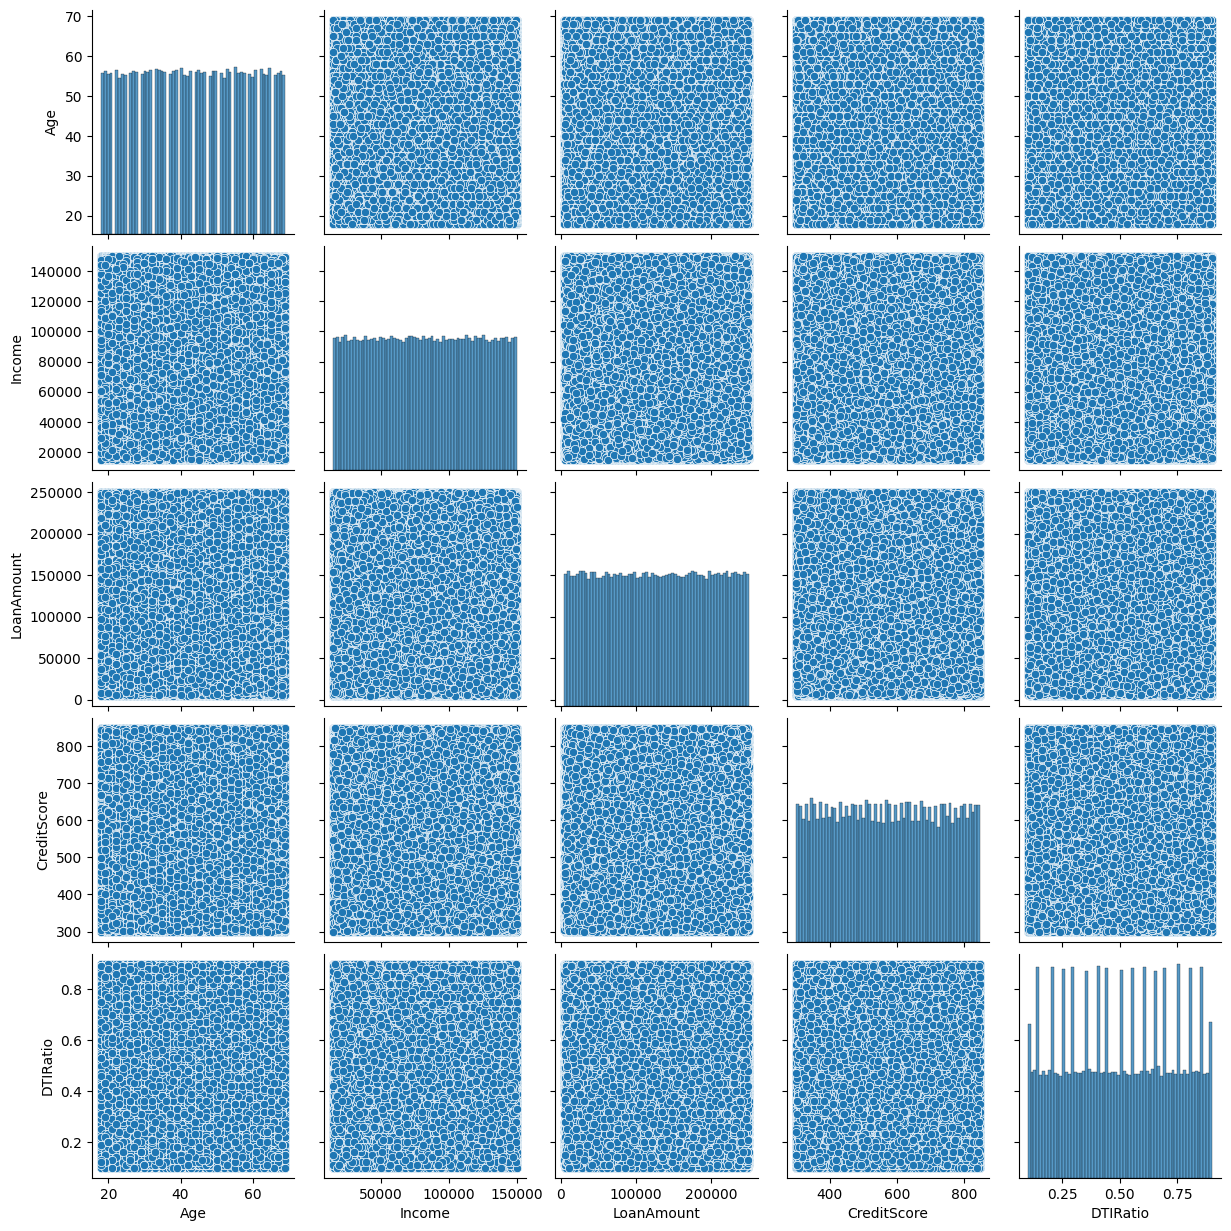

In [8]:
sns.pairplot(train_df, vars=['Age', 'Income', 'LoanAmount', 'CreditScore', 'DTIRatio'])
plt.show()

## Grouping and Aggregation

In [9]:
train_df.groupby(['Education','EmploymentType','MaritalStatus','LoanPurpose','HasMortgage','HasDependents','HasCoSigner'])['LoanAmount'].mean().reset_index()

,Education,EmploymentType,MaritalStatus,LoanPurpose,HasMortgage,HasDependents,HasCoSigner,LoanAmount
0,Bachelor's,Full-time,Divorced,Auto,No,No,No,133263.789474
1,Bachelor's,Full-time,Divorced,Auto,No,No,Yes,130102.578231
2,Bachelor's,Full-time,Divorced,Auto,No,Yes,No,120791.945946
3,Bachelor's,Full-time,Divorced,Auto,No,Yes,Yes,133302.834586
4,Bachelor's,Full-time,Divorced,Auto,Yes,No,No,130041.008475
...,...,...,...,...,...,...,...,...
1915,PhD,Unemployed,Single,Other,No,Yes,Yes,126056.432836
1916,PhD,Unemployed,Single,Other,Yes,No,No,130298.581560
1917,PhD,Unemployed,Single,Other,Yes,No,Yes,121824.656000
1918,PhD,Unemployed,Single,Other,Yes,Yes,No,129848.208955


In [10]:
train_df.groupby(['Education'])['LoanAmount'].mean().reset_index()

,Education,LoanAmount
0,Bachelor's,127390.632026
1,High School,127393.676823
2,Master's,127710.986450
3,PhD,127823.681178


In [11]:
train_df.groupby(['EmploymentType'])['LoanAmount'].mean().reset_index()

,EmploymentType,LoanAmount
0,Full-time,127469.866595
1,Part-time,127329.702904
2,Self-employed,127436.700232
3,Unemployed,128079.958182


In [12]:
train_df.groupby(['MaritalStatus'])['LoanAmount'].mean().reset_index()

,MaritalStatus,LoanAmount
0,Divorced,127810.225265
1,Married,127250.951326
2,Single,127676.481403


In [13]:
train_df.groupby(['LoanPurpose'])['LoanAmount'].mean().reset_index()

,LoanPurpose,LoanAmount
0,Auto,127857.908721
1,Business,127141.807458
2,Education,127645.822841
3,Home,127622.382853
4,Other,127629.648054


In [14]:
train_df.groupby(['HasMortgage'])['LoanAmount'].mean().reset_index()

,HasMortgage,LoanAmount
0,No,127635.602812
1,Yes,127522.131324


In [15]:
train_df.groupby(['HasDependents'])['LoanAmount'].mean().reset_index()

,HasDependents,LoanAmount
0,No,127569.000799
1,Yes,127588.719646


In [16]:
train_df.groupby(['HasCoSigner'])['LoanAmount'].mean().reset_index()

,HasCoSigner,LoanAmount
0,No,127709.804827
1,Yes,127447.982592


## Outlier Detection

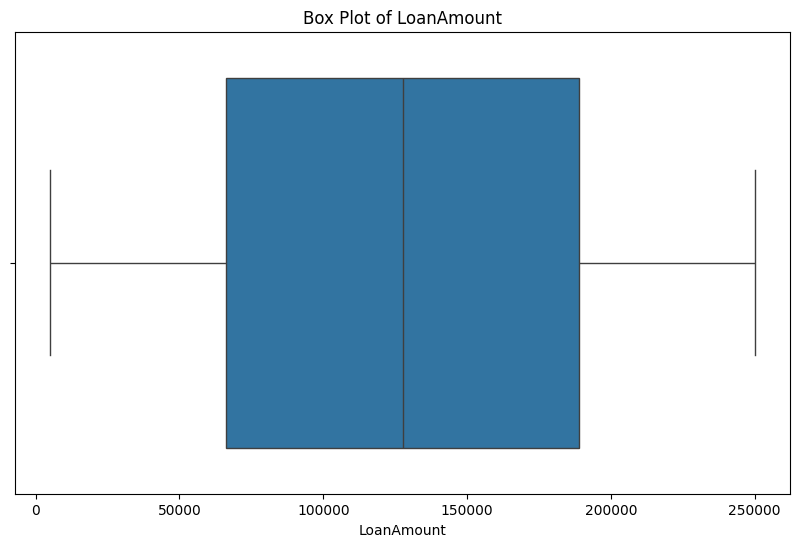

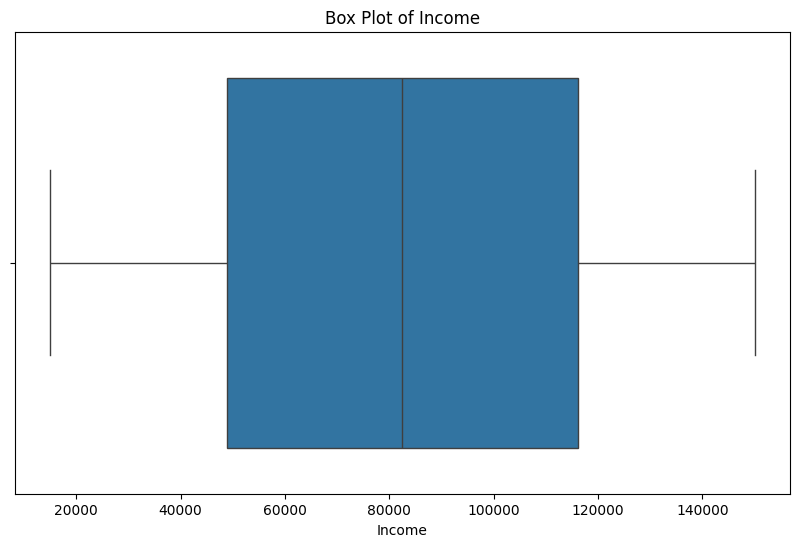

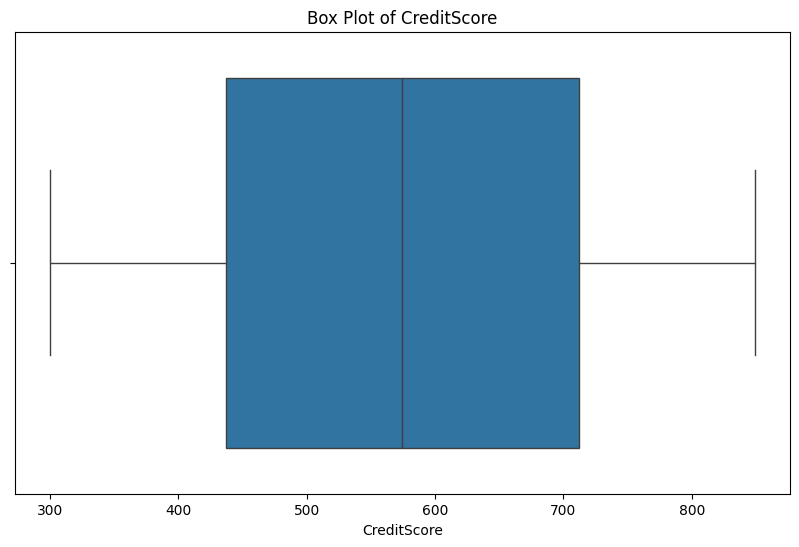

In [17]:
columns_to_analyze = ['LoanAmount', 'Income', 'CreditScore']

# Create box plots for each column
for col in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

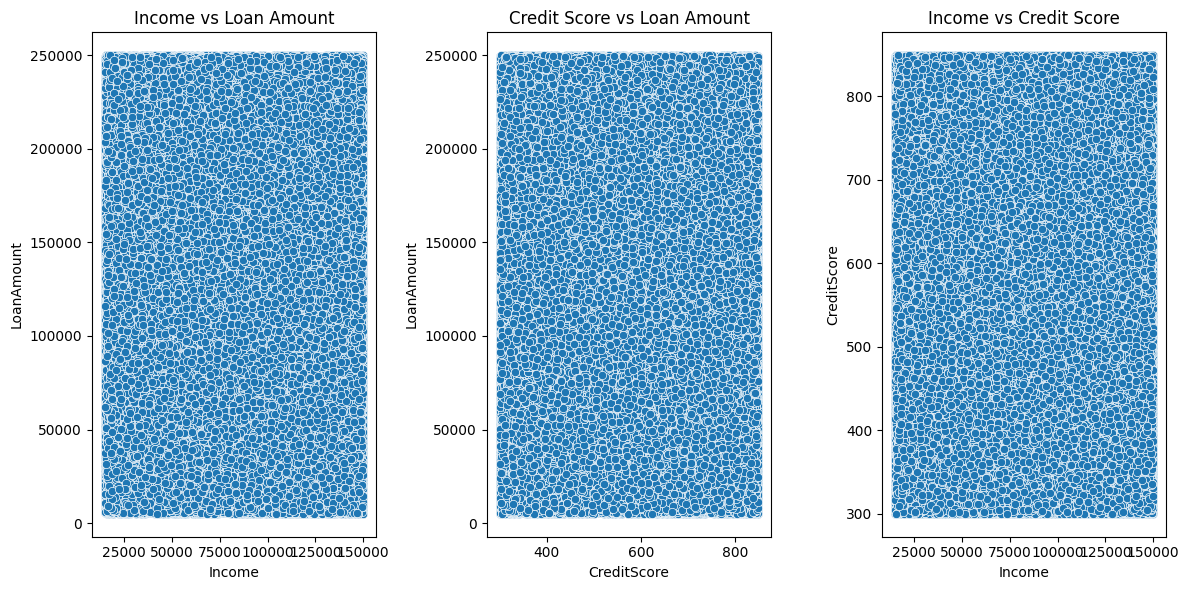

In [18]:
plt.figure(figsize=(12, 6))

# Scatter plot for Income vs Loan Amount
plt.subplot(1, 3, 1)
sns.scatterplot(x='Income', y='LoanAmount', data=train_df)
plt.title('Income vs Loan Amount')

# Scatter plot for Credit Score vs Loan Amount
plt.subplot(1, 3, 2)
sns.scatterplot(x='CreditScore', y='LoanAmount', data=train_df)
plt.title('Credit Score vs Loan Amount')

# Scatter plot for Income vs Credit Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='Income', y='CreditScore', data=train_df)
plt.title('Income vs Credit Score')

plt.tight_layout()
plt.show()

In [19]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for each specified column
outliers_dict = {}
for col in columns_to_analyze:
    outliers_dict[col] = detect_outliers_iqr(train_df, col)

# Display outliers for each column
for col, outliers in outliers_dict.items():
    print(f'Outliers detected in {col}:')
    print(outliers[[col]].head(), '\n')

Outliers detected in LoanAmount:
Empty DataFrame
Columns: [LoanAmount]
Index: [] 

Outliers detected in Income:
Empty DataFrame
Columns: [Income]
Index: [] 

Outliers detected in CreditScore:
Empty DataFrame
Columns: [CreditScore]
Index: [] 

